Group Project Proposal

Title:  Classification using Dry Bean Data Set of 7 Bean Types

Introduction:

We will be working with the Dry Bean Dataset from the University of Irvine. This dataset contains information on 7 different Dry beans (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira). Images of 13,611 beans were taken by a high-resolution camera. Based on these images, data was recorded for 16 variables/features such as area, perimeter, aspect ration, etc. The question we would like to answer is: can we classify/predict an unknown bean type into one of the 7 classes of dry beans?

To answer this question, we will be using the two variables: minor axis length and roundness. The definitions for these relevant terms and abbreviations are defined in the site containing the dataset (https://archive.ics.uci.edu/dataset/602/dry+bean+dataset).


Preliminary exploratory data analysis:

In [65]:
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(readxl)
library(gridExtra)
library(RColorBrewer)
require(gridExtra)
options(repr.matrix.max..rows = 6)
set.seed(99999)

In [71]:

url <- "https://github.com/Adrianna-Nimmons/dsci-100-project-group51/raw/main/beans.xlsx"
download.file(url, "beans.xlsx")
beans_data <- read_excel("beans.xlsx")
beans_data <- mutate(beans_data, Class = as_factor(Class))

beans_split <- initial_split(beans_data, prop = 0.75, strata = Class)
beans_training <- training(beans_split)
beans_testing <- testing(beans_split) 

new_table_1<- beans_training |>
            group_by(Class)|>
            # summarize(count=n())
             summarize(Mean_Shape_Factor_1 = mean(ShapeFactor1), Mean_Shape_Factor_2 = mean(ShapeFactor2),Mean_Equivalent_Diameter = mean(EquivDiameter), Mean_Minor_Axis_Length = mean(MinorAxisLength), Mean_Convex_Area = mean(ConvexArea), Mean_Roundness = mean(roundness),count=n())
new_table_1
beans_training

Class,Mean_Shape_Factor_1,Mean_Shape_Factor_2,Mean_Equivalent_Diameter,Mean_Minor_Axis_Length,Mean_Convex_Area,Mean_Roundness,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SEKER,0.006330829,0.0025414610,225.0271,202.0217,40295.48,0.9446319,1518
BARBUNYA,0.005354212,0.0013946606,297.3661,240.4087,71048.33,0.8001652,994
BOMBAY,0.003440254,0.0008420997,469.4848,374.6481,176270.37,0.8633004,398
CALI,0.005465190,0.0011090912,309.1280,236.0919,76489.90,0.8461274,1214
HOROZ,0.006996593,0.0010486848,260.9819,184.4805,54555.44,0.7949345,1452
SIRA,0.006727463,0.0016832078,238.1145,190.5895,45190.33,0.8844306,1971
DERMASON,0.007759953,0.0021653733,201.4701,165.5571,32428.87,0.9085900,2659


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
42012,809.770,266.7004,202.3811,1.317813,0.6512851,43087,231.2819,0.7709756,0.9750505,0.8051186,0.8671976,0.006348196,0.002214636,0.7520317,0.9910370,BARBUNYA
45564,802.744,296.0737,196.3403,1.507962,0.7484895,46120,240.8607,0.7464613,0.9879445,0.8885412,0.8135161,0.006497974,0.001755587,0.6618085,0.9979820,BARBUNYA
46278,846.308,300.6302,196.4784,1.530093,0.7568788,47102,242.7406,0.7909958,0.9825061,0.8119468,0.8074390,0.006496180,0.001703243,0.6519577,0.9975557,BARBUNYA
48160,829.234,304.5283,202.7155,1.502245,0.7462457,48950,247.6272,0.7540434,0.9838611,0.8801205,0.8131500,0.006323262,0.001705311,0.6612129,0.9933035,BARBUNYA
48638,874.041,301.9840,205.4110,1.470145,0.7330219,49596,248.8530,0.7477477,0.9806839,0.8000589,0.8240604,0.006208807,0.001766136,0.6790755,0.9983394,BARBUNYA
49166,856.332,293.7756,214.1689,1.371701,0.6844902,50168,250.2001,0.7759785,0.9800271,0.8425397,0.8516709,0.005975177,0.001939179,0.7253434,0.9949539,BARBUNYA
49991,911.824,329.2584,193.8197,1.698787,0.8083842,51285,252.2905,0.7374174,0.9747685,0.7555786,0.7662387,0.006586354,0.001400494,0.5871217,0.9973950,BARBUNYA
50486,982.666,325.5099,198.5238,1.639652,0.7924894,51525,253.5365,0.7999430,0.9798350,0.6570054,0.7788903,0.006447528,0.001463788,0.6066701,0.9947277,BARBUNYA
50683,905.491,314.9376,205.4562,1.532870,0.7578996,51613,254.0307,0.7698839,0.9819813,0.7767905,0.8066065,0.006213870,0.001622515,0.6506141,0.9973065,BARBUNYA


MinorAxisLength,roundness,Class
<dbl>,<dbl>,<fct>
0.0008817115,-1.14793102,BARBUNYA
-0.1326806787,0.25538434,BARBUNYA
-0.1296258764,-1.03306916,BARBUNYA
0.0082758644,0.11373344,BARBUNYA
0.0678734886,-1.23304388,BARBUNYA
0.2615101444,-0.51844133,BARBUNYA
-0.1884112606,-1.98128093,BARBUNYA
-0.0844023770,-3.63945520,BARBUNYA
0.0688727613,-1.62445955,BARBUNYA


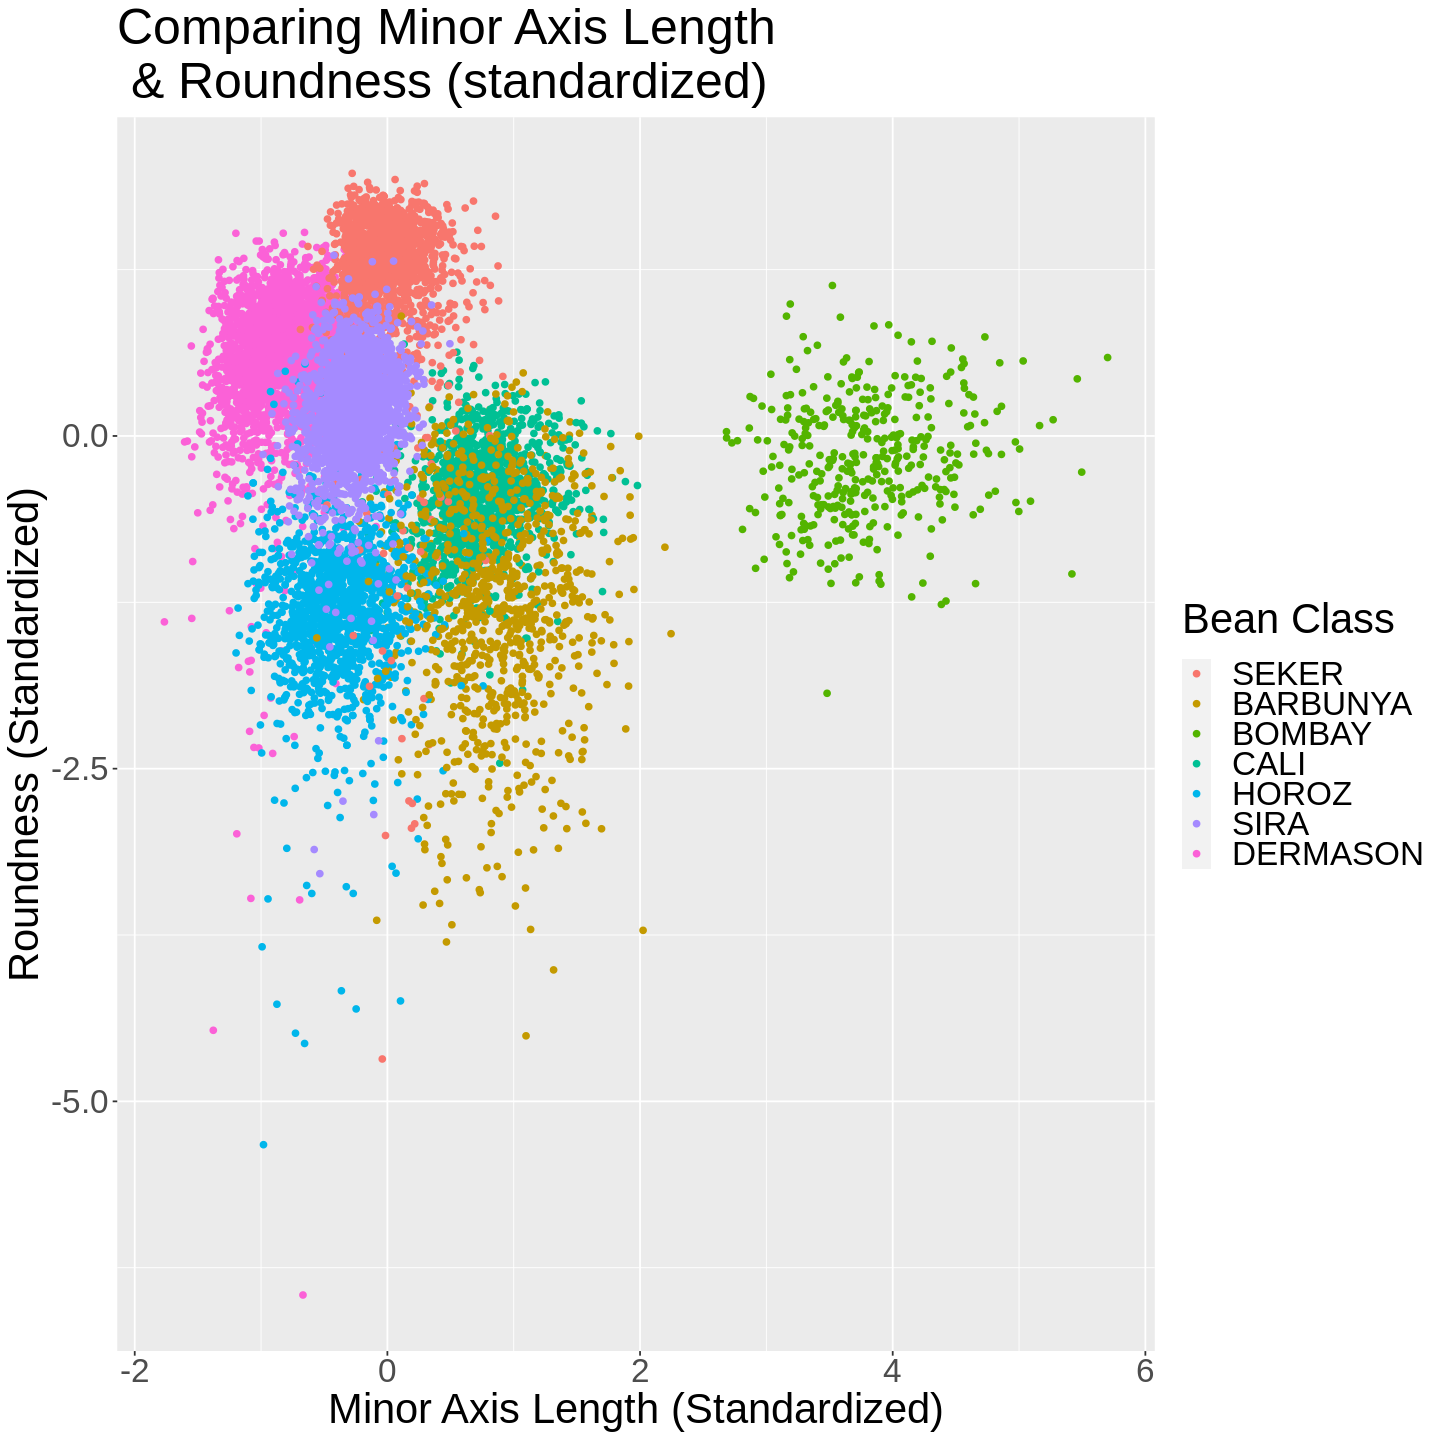

In [74]:

scaled_beans_training_recipe <- recipe(Class ~ MinorAxisLength + roundness, data = beans_training) |>
                      step_scale(all_predictors()) |>
                     step_center(all_predictors())

scaled_beans_training <- scaled_beans_training_recipe |>  
                           prep() |> 
                           bake(beans_training)


scaled_beans_training

beans_shape_factor_plot <- ggplot(scaled_beans_training, aes(x = MinorAxisLength, y = roundness, color = Class))+
geom_point() +
labs( x = "Minor Axis Length (Standardized)", y = "Roundness (Standardized)", color = "Bean Class")+
ggtitle("Comparing Minor Axis Length \n & Roundness (standardized)") +
theme(text = element_text(size = 25))+
scale_fill_brewer(palette = "Set1")
options(repr.plot.width = 12, repr.plot.height = 12)

beans_shape_factor_plot
   


    Methods:

According to the article written by Khan et.al in 2023, the most important features in classifying the class of the dry bean were the following: ShapeFactor2, ShapeFactor1, Minor Axis Length, EquivDiameter, Roundness and ConvexArea (Khan et.al, 2023). Therefore, we narrowed down our predictors to these 6 variables.

To narrow it down even further, we decided to use minor axis length and roundness. This is because when plotted against each other, the scatter plot produced shows a distinct difference between the 7 classes when using the colour function. 

To summarize, we will be using a scatter plot of the variables minor axis length and roundness to predict the bean class of unknown beans. The scatter plot shown above shows the relationship between minor axis length and roundness, allowing the visualization of how different classes of beans have different measurements when taking in these features in account together, which allows  them to be distinctly classified. 




     Expected outcomes and significance:

We expect that the difference in variables obtained from the images will be significant enough such that classification between different types of bean class would be possible.

These findings may be useful for people who work in agriculture food manufacturing/quality assurance companies who work with beans. Making sure that the beans are consistent in shape is essential for food quality assurance practices in obtaining quality products. Moreover, with computer imagery, inspection of beans would require less human labour and error. Manually categorizing beans by hand can also be challenging and time consuming. 

Further questions we have are:

1. What bean types are most similar or different to one another - could this data be used to analyze evolutionary relationships?

2. What beans are the most common/widely produced? Would this have effects on the pricing of different classes of beans?




Please submit your group project proposal. Only one member of your team needs to submit. 